In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
diabetes = pd.DataFrame(pd.read_csv(r"C:\Users\vargh\OneDrive\Desktop\PGA02\diabetes.csv"))

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# split dataset in features and target variable
feature_cols =['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [6]:
# Split x and y into training and testing sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
# random_state is the object that controls randomization during splitting.

In [7]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model(using the default parameters)
logreg = LogisticRegression(solver='lbfgs',max_iter=400)

# solver='lbfgs' - Algorithm to use in the optimization problem
# max_iter = 400 - Maximum number of iterations taken for the solvers to converge

# fit the model with data
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

In [8]:
# import the metric class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

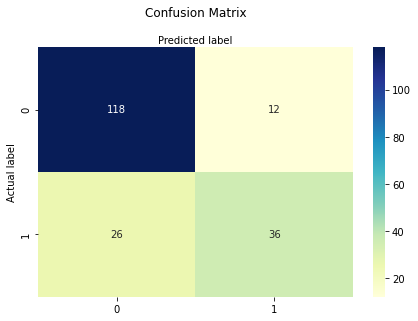

In [9]:
class_names = [0,1]  # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# The arange() function is used to get evenly spaced values within a given interval
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu', fmt='g')

# heatmap() fmt parameter - add text on each cell.
# The annot only help to add numeric value on python
# heatmap cell but fmt parameter allows to add string (text) values on the cell.
# 'g' General format

ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))
print('Precision:',metrics.precision_score(y_test,y_pred))
print('Recall:',metrics.recall_score(y_test,y_pred))

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


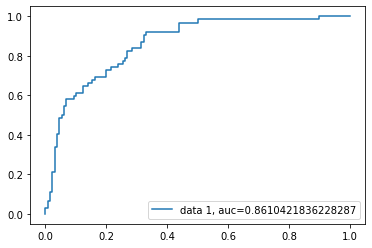

In [11]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]

#The function predict_proba() returns a numpy array of two columns. The first column is the probability
#that target=0 and the second column is the probability that target=1 . That is why we add [:,1] after
#predict_proba() in order to get the probabilities of target=1 .

fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

#The TPR defines how many correct positive results occur among all positive samples available during
#the test
#FPR, on the other hand, defines how many incorrect positive results occur among all negative samples
#available during the test
#Threshold corresponds to a point on the ROC curve that is colinear with adjacent points